Dataset description page: https://archive.ics.uci.edu/ml/datasets/Facebook+Comment+Volume+Dataset

In [ ]:
# Loading the dataset(zipped) with a google drive id
! gdown 1ak_rxZ1XrenunEZK62t9U61XYe8mp-EU

# Unzipping the dataset to a folder named "unzipped_data". The directory can be found by clicking on the Files icon on the leftmost column
# The command automatically checks for existence of unzipped data so re-running it does not lead to multiple unzips
# However, running it for the first time will generate a bunch of checker prints. To remove them for simplicity, simply re-run this cell
!unzip -u "/content/Dataset.zip" -d "/content/unzipped_data"

Downloading...
From: https://drive.google.com/uc?id=1ak_rxZ1XrenunEZK62t9U61XYe8mp-EU
To: /content/Dataset.zip
100% 19.1M/19.1M [00:00<00:00, 49.2MB/s]
Archive:  /content/Dataset.zip
   creating: /content/unzipped_data/Dataset/
  inflating: /content/unzipped_data/Dataset/.DS_Store  
   creating: /content/unzipped_data/__MACOSX/
   creating: /content/unzipped_data/__MACOSX/Dataset/
  inflating: /content/unzipped_data/__MACOSX/Dataset/._.DS_Store  
  inflating: /content/unzipped_data/Dataset/Catagory_File - Feature 4.pdf  
  inflating: /content/unzipped_data/__MACOSX/Dataset/._Catagory_File - Feature 4.pdf  
   creating: /content/unzipped_data/Dataset/Testing/
  inflating: /content/unzipped_data/Dataset/Testing/.DS_Store  
   creating: /content/unzipped_data/__MACOSX/Dataset/Testing/
  inflating: /content/unzipped_data/__MACOSX/Dataset/Testing/._.DS_Store  
  inflating: /content/unzipped_data/Dataset/Testing/Features_TestSet.csv  
  inflating: /content/unzipped_data/__MACOSX/Dataset/Test

**Importing all the training datasets:**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler

column_names = {0: "page_likes",
                1: "page_checkins", #page visits
                2: "page_talking_about",
                3: "page_category",
                4: "min_CC1",
                5: "max_CC1",
                6: "ave_CC1",
                7: "med_CC1",
                8: "std_CC1",
                9: "min_CC2",
                10: "max_CC2",
                11: "ave_CC2",
                12: "med_CC2",
                13: "std_CC2",
                14: "min_CC3",
                15: "max_CC3",
                16: "ave_CC3",
                17: "med_CC3",
                18: "std_CC3",
                19: "min_CC4",
                20: "max_CC4",
                21: "ave_CC4",
                22: "med_CC4",
                23: "std_CC4",
                24: "min_CC5",
                25: "max_CC5",
                26: "ave_CC5",
                27: "med_CC5",
                28: "std_CC5",
                29: "CC1",
                30: "CC2",
                31: "CC3",
                32: "CC4",
                33: "CC5",
                34: "base_time",
                35: "post_length",
                36: "post_share_count",
                37: "post_isPromoted",
                38: "h_local",
                39: "published_on_sun",
                40: "published_on_mon",
                41: "published_on_tue",
                42: "published_on_wed",
                43: "published_on_thu",
                44: "published_on_fri",
                45: "published_on_sat",
                46: "base_day_sun",
                47: "base_day_mon",
                48: "base_day_tue",
                49: "base_day_wed",
                50: "base_day_thu",
                51: "base_day_fri",
                52: "base_day_sat",
                53: "num_comments_in_next_h"}


def norm(df):
  df_X = df.drop(columns='num_comments_in_next_h')
  df_y = df[['num_comments_in_next_h']]
  # print(df_y)
  scaler = MinMaxScaler()
  scaler.fit(df_X)
  df_X_norm = scaler.transform(df_X)
  df_X_norm = pd.DataFrame(df_X_norm, columns = df_X.columns)
  df_norm = pd.concat([df_X_norm, df_y], axis=1)
  # print(df_norm[['num_comments_in_next_h']])
  return df_norm

df1 = pd.read_csv("/content/unzipped_data/Dataset/Training/Features_Variant_1.csv", header = None)

# Rename columns 
df1 = df1.rename(columns = column_names)

# Convert catogory to dummy variables
dummy_df1 = pd.get_dummies(df1, columns=['page_category'])

# Split train & test data
df1_train = dummy_df1.sample(frac = 0.8, random_state=3244)
df1_test = dummy_df1.drop(df1_train.index)

df1_test_reindex = df1_test.reset_index(drop=True)
df1_train_reindex = df1_train.reset_index(drop=True)

# Normalize train and test data separately
df1_train_norm = norm(df1_train_reindex)
df1_test_norm = norm(df1_test_reindex)

y_train = np.array(df1_train_norm.loc[:,["num_comments_in_next_h"]], dtype=float)
X_train = np.array(df1_train_norm.loc[:, df1_train_norm.columns != "num_comments_in_next_h"], dtype=float)

y_test = np.array(df1_test_norm.loc[:,["num_comments_in_next_h"]], dtype=float)
X_test = np.array(df1_test_norm.loc[:, df1_test_norm.columns != "num_comments_in_next_h"], dtype=float)

In [ ]:
y_train = pd.DataFrame(y_train)
X_train = pd.DataFrame(X_train)

y_test = pd.DataFrame(y_test)
X_test = pd.DataFrame(X_test)

**Implementing Decision Tree Regressor**

In [ ]:
# Import Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Create Decision Tree regressor object
dtreg = DecisionTreeRegressor(random_state = 3244)

# Train Decision Tree Regressor
dtreg = dtreg.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = dtreg.predict(X_test)

# Evaluation using R^2 and MSE
print("R^2:",r2_score(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
results1 = [1, "DecisionTreeReg", 133, mean_squared_error(y_test, y_pred), round(r2_score(y_test,y_pred), 3)]

R^2: 0.09024233636464563
MSE: 1046.6264957264957


**Visualising the trend of R^2 and MSE across different values of max_depth:**

In [ ]:
r2_score_ls = []
mse_ls = []

for i in range(1, len(X_train.columns)):
  dtreg = DecisionTreeRegressor(max_depth = i, random_state = 3244)
  dtreg = dtreg.fit(X_train,y_train)
  y_pred = dtreg.predict(X_test)
  r2 = r2_score(y_test,y_pred)
  mse = mean_squared_error(y_test,y_pred)
  r2_score_ls.append(r2)
  mse_ls.append(mse)

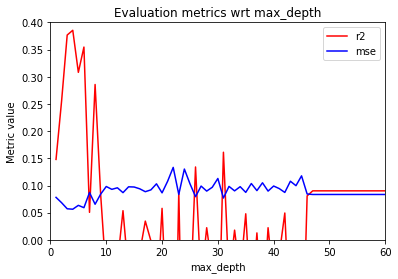

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

row = [i for i in range(1, len(X_train.columns))]
plt.plot(row, r2_score_ls, color = 'red', label = "r2")
plt.plot(row, normalize([mse_ls]).flatten().tolist(), color = 'blue', label = "mse")
plt.title("Evaluation metrics wrt max_depth")
plt.xlabel("max_depth")
plt.ylabel("Metric value")
plt.legend()
plt.xlim([0,60])
plt.ylim([0,0.4])
plt.show()

In [ ]:
print("max_depth which maximises r2_score:", r2_score_ls.index(max(r2_score_ls))+1)
print("max_depth which minimises mse:", mse_ls.index(min(mse_ls))+1)

max_depth which maximises r2_score: 4
max_depth which minimises mse: 4


In [ ]:
# Create Decision Tree regressor object
dtreg = DecisionTreeRegressor(max_depth = 4, random_state = 3244)

# Train Decision Tree Regressor
dtreg = dtreg.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = dtreg.predict(X_test)

# Evaluation using R^2 and MSE
print("R^2:",r2_score(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
# dtreg_features = [29,33,35,32,6,17,2]
results2 = [2, "DecesionTreeReg", 4, mean_squared_error(y_test, y_pred), round(r2_score(y_test,y_pred), 3)]

R^2: 0.38559571037118845
MSE: 706.8385728611742


A significant improvement of performance on both R^2 and MSE. Pruning the decision tree has mitigated the overfitting issue

**Plotting the decision tree**

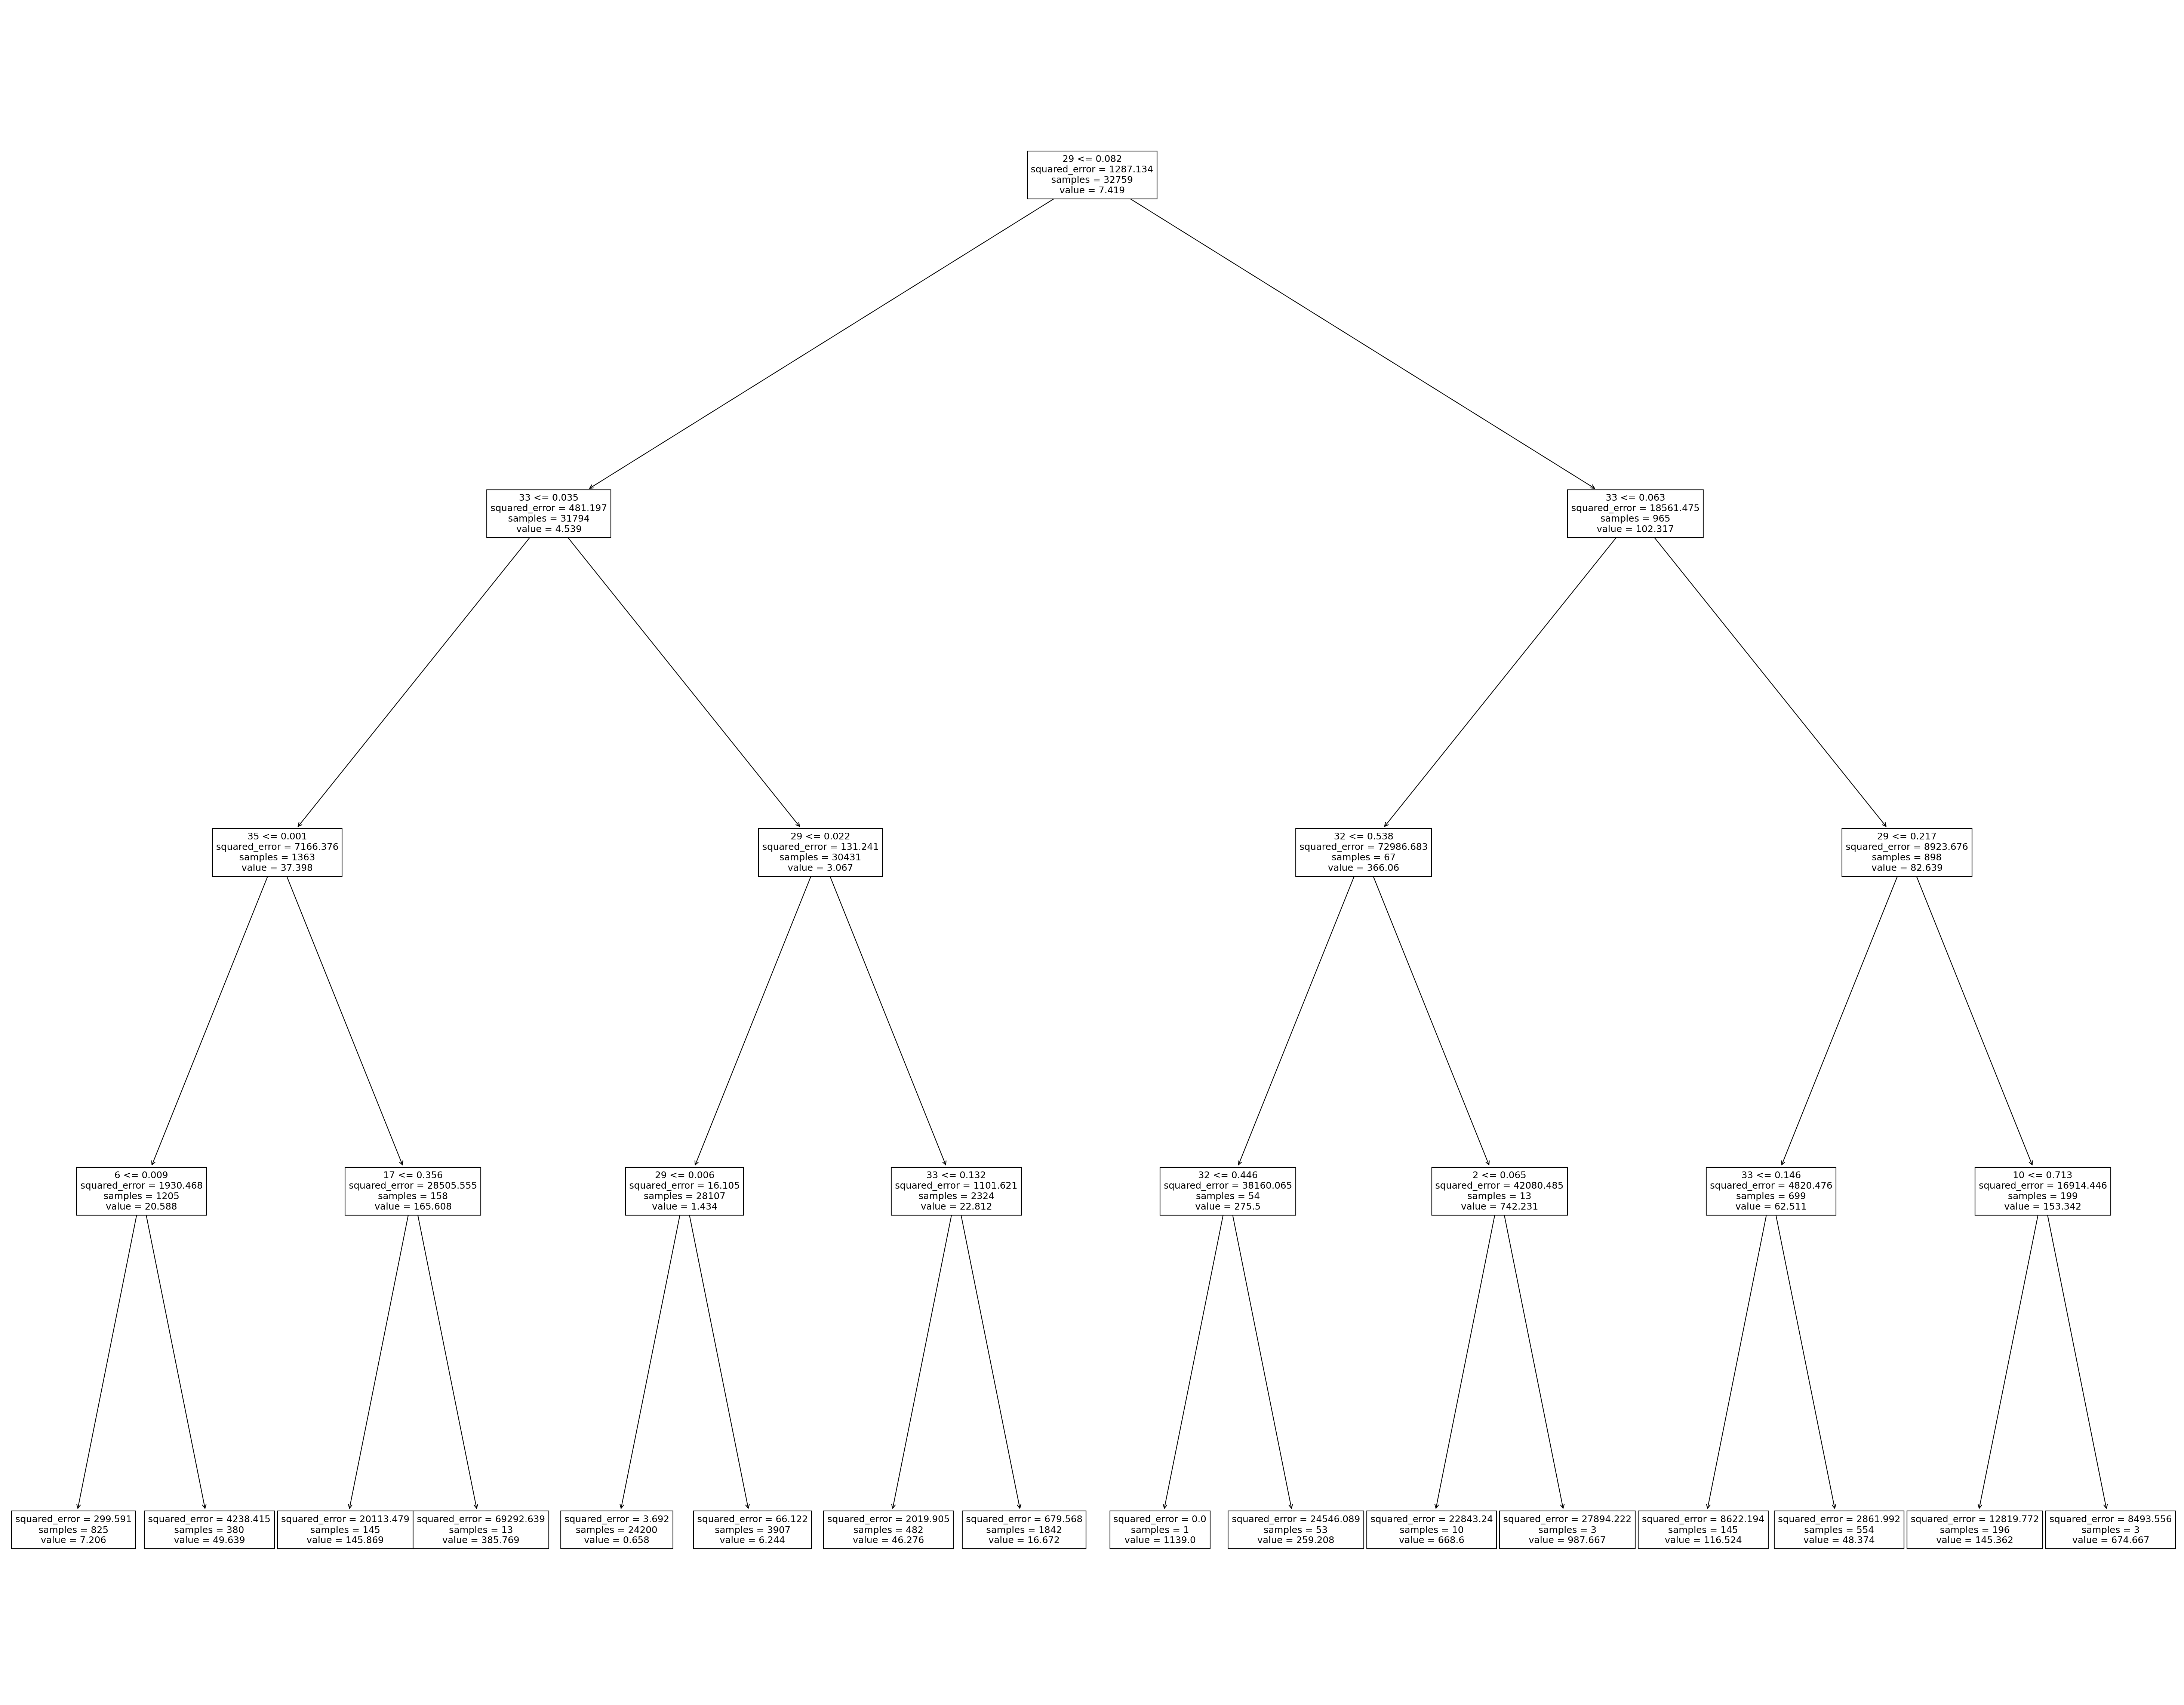

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(40,30), dpi=150)
plot_tree(dtreg, feature_names=X_train.columns);

**Implementing Extra Trees Regressor**

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
# Create Extra Tree Regressor object
etr = ExtraTreesRegressor(max_depth=4, random_state = 3244)

# Train Extra Tree Regressor
etr = etr.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = etr.predict(X_test)

# Evaluation using R^2 and MSE
print("R^2:",r2_score(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
results3 = [3, "ExtraTreesReg", 4, mean_squared_error(y_test, y_pred), round(r2_score(y_test,y_pred), 3)]

R^2: 0.420175597850009
MSE: 667.0563012725493


**Implementing Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create Random Forest Regressor object
rfg = RandomForestRegressor(max_depth=4, random_state = 3244)

# Train Random Forest Regressor
rfg = rfg.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = rfg.predict(X_test)

# Evaluation using R^2 and MSE
print("R^2:",r2_score(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
results4 = [4, "RandomForestReg", 4, mean_squared_error(y_test, y_pred), round(r2_score(y_test,y_pred), 3)]

R^2: 0.5219687856167726
MSE: 549.9487992863284


**Here we implement the 10-fold HalvingGridSearch Cross-Validation to find out the best combination between max_depth and max_features**

In [ ]:
from sklearn.experimental import enable_halving_search_cv

from sklearn.model_selection import HalvingGridSearchCV

import warnings

warnings.filterwarnings('ignore')

etr = ExtraTreesRegressor(random_state = 3244)

param_grid = [{'max_depth': list(range(2, 10)), 'max_features': list(range(1,133))}]

etr = HalvingGridSearchCV(etr, param_grid, cv = 10, scoring='r2', random_state = 3244)

etrcv = etr.fit(X_train, y_train)

print(etrcv.best_params_)

print(etrcv.best_score_)

{'max_depth': 3, 'max_features': 121}
0.4292793300693375


**Applying the previous results to see the performance on the test dataset**

In [ ]:
from sklearn import metrics

import warnings

warnings.filterwarnings('ignore')

etr = ExtraTreesRegressor(max_depth=3, max_features=121, random_state = 3244)
etr.fit(X_train, y_train)
y_pred = etr.predict(X_test)

# Evaluation using R^2 and MSE
print("R^2:",r2_score(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

R^2: 0.35941313204270176
MSE: 736.9601989824928


**To investigate which features give more significant contributions to the result, we compare the root-mean-squared value of the different features**

In [ ]:
from math import sqrt

# Create Extra Tree Regressor object
extratree_reg = ExtraTreesRegressor(criterion = "friedman_mse", max_depth=4, random_state=3244)

# Train Extra Tree Regressor
extratree_reg.fit(X_train, y_train)

# Predict the response for test dataset
y_predicted = extratree_reg.predict(X_test)

# Calculating root-mean-squared value
rms = sqrt(mean_squared_error(y_test, y_predicted))

print(rms, extratree_reg.feature_importances_)

# Sorting the features' importance in a descending order 
print(np.argsort(extratree_reg.feature_importances_)[::-1])
results5 = [5, "ExtraTreesRegCV", 4, mean_squared_error(y_test, y_pred), round(r2_score(y_test,y_pred), 3)]

25.82743311427888 [4.14865476e-04 1.33211545e-04 4.26986271e-04 0.00000000e+00
 1.83140707e-03 1.25861379e-02 8.22229098e-03 5.87564105e-03
 6.09682060e-04 2.42840419e-04 1.39800470e-02 4.42625965e-03
 7.52456081e-03 0.00000000e+00 1.04187322e-03 5.67454664e-03
 9.53233432e-03 1.66357690e-03 3.44643674e-04 3.26110163e-04
 7.79484881e-03 1.46059747e-02 7.07911339e-03 1.03022049e-03
 3.76619661e-04 5.95262028e-04 2.55051416e-03 5.81310886e-03
 3.68404127e-02 3.30653460e-01 2.82991182e-03 4.32574080e-02
 1.42701621e-01 2.98312927e-01 4.47639861e-04 1.48599401e-02
 0.00000000e+00 0.00000000e+00 2.65071352e-04 1.36325719e-03
 7.66912543e-04 3.68869067e-04 1.36944634e-04 1.04975930e-04
 0.00000000e+00 3.15364801e-04 3.82938219e-04 3.51104894e-04
 8.65795805e-05 1.30472610e-04 0.00000000e+00 1.55618332e-04
 0.00000000e+00 1.56518721e-04 7.16178942e-05 9.38020553e-04
 2.91061068e-04 0.00000000e+00 2.41406659e-04 3.79065131e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.537

**After finishing the analysis on Extra Trees Regressor, we apply the same steps on Random Forest Regressor**

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn import metrics

import warnings

warnings.filterwarnings('ignore')

rfc = RandomForestRegressor(random_state = 3244)

param_grid = [{'max_depth': list(range(2, 10)), 'max_features': list(range(1,133))}]

rfc = HalvingGridSearchCV(rfc, param_grid, cv = 10, scoring='r2', random_state = 3244)

rfc.fit(X_train, y_train)

print(rfc.best_params_)

print(rfc.best_score_)

{'max_depth': 9, 'max_features': 76}
0.6685154779508966


In [ ]:
rfr = RandomForestRegressor(max_depth=9, max_features=76, random_state = 3244)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

# Evaluation using R^2 and MSE
print("R^2:",r2_score(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

R^2: 0.5314552798701686
MSE: 539.0351058556116


Here it can be seen that the random forest regressor with 10-fold halving grid search cross-validation gives us the best results so far on the test dataset. The final results will be tabulater later at the end of the file

In [ ]:
# Create Random Forest Regressor object
rnd_clf = RandomForestRegressor(max_depth=4, random_state=3244)

# Train Random Forest Regressor
rnd_clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_rf = rnd_clf.predict(X_test)

# Calculating root-mean-squared value
rms = sqrt(mean_squared_error(y_test, y_pred_rf))

print(rms, rnd_clf.feature_importances_)

# Sorting the features' importance in a descending order 
print(np.argsort(rnd_clf.feature_importances_)[::-1])
results6 = [6, "RandomForestRegCV", 9, mean_squared_error(y_test, y_pred), round(r2_score(y_test,y_pred), 3)]

23.450987170827766 [1.08759054e-03 2.56414856e-04 2.68968352e-03 3.68991839e-04
 2.41187453e-03 2.98870303e-03 5.38258590e-03 3.95420933e-03
 0.00000000e+00 1.10457604e-03 8.87780784e-03 1.27931737e-03
 1.04070882e-02 0.00000000e+00 1.11348923e-02 3.19438171e-03
 2.36380411e-03 1.37771733e-03 6.57793674e-04 1.66584662e-03
 4.32929884e-03 2.38955970e-03 7.25902230e-04 1.16710684e-02
 4.94715318e-04 9.50631916e-03 1.30598744e-03 2.10495160e-03
 1.99439090e-02 3.22687476e-01 0.00000000e+00 2.13831775e-02
 1.27030546e-01 3.08206424e-01 9.51879962e-04 1.03291598e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.55211078e-04 1.68176786e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.74048113e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.66034674e-06 0.00000000e+00 2.29482767e-04 1.01893819e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00

In [ ]:
from tabulate import tabulate

headers = ["Num", "Model", "Max_depth", "MSE", "R-squared","Significant Features"]
results_table = [headers, results1, results2, results3, results4, results5, results6]

print(tabulate(results_table, headers='firstrow', tablefmt='fancy_grid', numalign="right"))

╒═══════╤═══════════════════╤═════════════╤═════════╤═════════════╕
│   Num │ Model             │   Max_depth │     MSE │   R-squared │
╞═══════╪═══════════════════╪═════════════╪═════════╪═════════════╡
│     1 │ DecisionTreeReg   │         133 │ 1046.63 │        0.09 │
├───────┼───────────────────┼─────────────┼─────────┼─────────────┤
│     2 │ DecesionTreeReg   │           4 │ 706.839 │       0.386 │
├───────┼───────────────────┼─────────────┼─────────┼─────────────┤
│     3 │ ExtraTreesReg     │           4 │ 667.056 │        0.42 │
├───────┼───────────────────┼─────────────┼─────────┼─────────────┤
│     4 │ RandomForestReg   │           4 │ 549.949 │       0.522 │
├───────┼───────────────────┼─────────────┼─────────┼─────────────┤
│     5 │ ExtraTreesRegCV   │           4 │  736.96 │       0.359 │
├───────┼───────────────────┼─────────────┼─────────┼─────────────┤
│     6 │ RandomForestRegCV │           9 │ 539.035 │       0.531 │
╘═══════╧═══════════════════╧═════════════╧═════